# Imports

In [2]:
import torch
import torchvision.models as models
from PIL import Image
from torchvision import transforms
from torchvision import models
import matplotlib.pyplot as plt

# Setting computation device

In [4]:
# Setting computation device

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using mps device


# Loading models

In [6]:
model = torch.load('VGG16_Model.pth', weights_only=False)

# Load the trained weights
#model.load_state_dict(torch.load('VGG16_Model.pth'))  
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
# # Load the trained weights
# model.load_state_dict(model)  
# model.eval()

In [8]:
print(type(model))

<class 'torchvision.models.vgg.VGG'>


# Image preprocessing

In [10]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3), # Convert grayscale to RGB
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [11]:
print(type(transform))

<class 'torchvision.transforms.transforms.Compose'>


# Testing the loaded model

### Inference 1

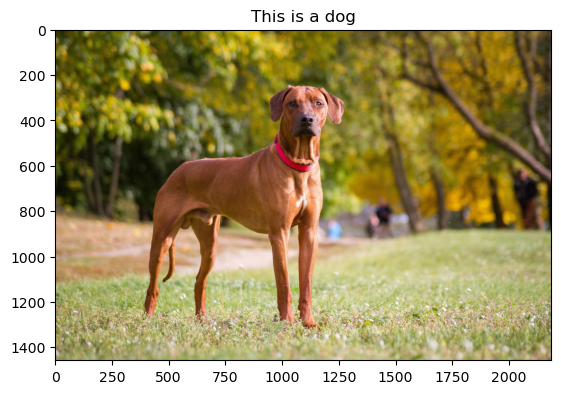

In [13]:


image_path = 'Inference_images/dummy_images/image20.jpg'

image20 = Image.open(image_path)

image_20_transformed = transform(image20)

image_20_transformed = image_20_transformed.unsqueeze(0)

image_20_transformed = image_20_transformed.to(device)

# model.eval()

with torch.no_grad():
    output = model(image_20_transformed)

_, predicted_class = torch.max(output, 1)

if predicted_class.item() == 0:
    plt.title('This is a cat')
    plt.imshow(image20) 
    plt.show()
else:
    plt.title('This is a dog')
    plt.imshow(image20) 
    plt.show()

### Inference 2

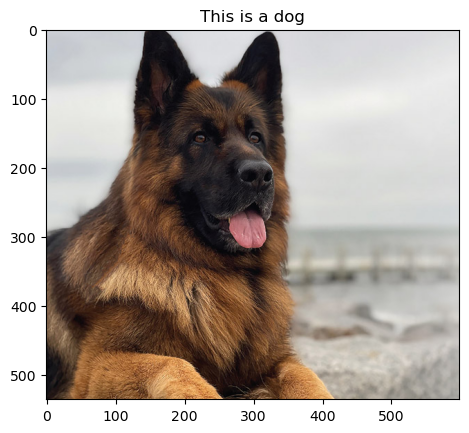

In [31]:
image_path = 'Inference_images/dummy_images/image19.jpg'

image19 = Image.open(image_path)

image_19_transformed = transform(image19)

image_19_transformed = image_19_transformed.unsqueeze(0)

image_19_transformed = image_19_transformed.to(device)

# model.eval()

with torch.no_grad():
    output = model(image_19_transformed)

_, predicted_class = torch.max(output, 1)

if predicted_class.item() == 0:
    plt.title('This is a cat')
    plt.imshow(image19) 
    plt.show()
else:
    plt.title('This is a dog')
    plt.imshow(image19) 
    plt.show()

In [34]:
! pip install fastAPI

In [36]:
! pip install streamlit_jupyter

  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.8.1
    Uninstalling ipywidgets-7.8.1:
      Successfully uninstalled ipywidgets-7.8.1


In [46]:
import streamlit as st

st.title("test")
st.write("double test")

2024-12-23 15:51:40.683 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [48]:
! streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py


      👋 Welcome to Streamlit!

      If you’d like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email:  ^C
2024-12-23 15:54:27.429 


In [56]:
! streamlit run Cats_and_dogs_models_fast_API.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: Cats_and_dogs_models_fast_API.py


In [62]:
import subprocess

# Run the Streamlit app as a subprocess
subprocess.run(["streamlit", "run", "streamlit run Cats_and_dogs_models_fast_API.py"])


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: streamlit run Cats_and_dogs_models_fast_API.py


CompletedProcess(args=['streamlit', 'run', 'streamlit run Cats_and_dogs_models_fast_API.py'], returncode=2)

In [68]:
! pip install fastapi uvicorn


In [1]:
from fastapi import FastAPI
import threading
import uvicorn

# FastAPI App definition
app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello from FastAPI in Jupyter!"}

@app.get("/items/{item_id}")
def read_item(item_id: int, q: str = None):
    return {"item_id": item_id, "q": q}

# Run FastAPI app in the background
def run():
    uvicorn.run(app, host="0.0.0.0", port=8000)

# Start FastAPI server in a new thread
thread = threading.Thread(target=run)
thread.start()


INFO:     Started server process [39122]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 48] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
